# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

The objective of this experiment is to visualize the implementation of Visual Bag of words

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P18_test" #@param {type:"string"}

In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "912345678" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython

ipython = get_ipython()
  
notebook="M1W2_CS_11_Visual_Bag_of_words" #name of the notebook

def setup():
  ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Casestudies_slides/Visual_BoW/Images.zip")
  ipython.magic("sx unzip Images.zip")
  ipython.magic("sx pip install opencv-python==3.4.2.16")
  ipython.magic("sx pip install opencv-contrib-python==3.4.2.16")
  print ("Setup completed successfully")
  return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


##*Please restart the runtime after running the set up block and continue from the next cell*

### Importing required packages

In [0]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

## Training Images: 

#### Given category name, dictionary to which we need to add images, index and whether images are test/train type returns dictionary with adding images present in the category.

#### Parameters: category - category name.
image_dict - dictionary to which images should be stored.
index - key value for dictionary.
i_type - either "test"/"train"/"kmeans"
#### Returns:
Nothing, since image_dict is already modified above.

In [0]:
def add_images(category, image_dict, index, i_type = "test"):
    temp_path = os.path.join(i_type, category)
    pathname = os.path.join("./Images", temp_path)
    image_dict[index] = []
    print("Category: " + str(category))
    for img in os.listdir(pathname):
        path_temp = os.path.join(pathname,img)
        print(path_temp)
        temp_img = cv2.imread(path_temp)
        image_dict[index].append(temp_img)
    return 


#### Given categories and whether test/train type images, searches in the images directory accordingly and returns the images.

#### Parameters: 
    * categories - list of strings. (Each string is a category).
    * i_type = specifies which images(i.e test/train)
    * Default is "test"

#### Return: 
        returns a dictionary, with keys representing 
        categories and its values representing images 
        present in the category.

#### Reading image files:

In [0]:
def get_image_dict(categories, i_type = "test"):

    if i_type == "test" or i_type == "train" or i_type == "kmeans":
        # Run only if i_type is either test/train.
        image_dict = {}
        for (index, category) in list(enumerate(categories)):
            add_images(category, image_dict, index, i_type)
        return image_dict
    else:
        raise Error("image type is not test or train")



In [0]:
categories = ['airplanes', 'chandelier', 'motorbikes', 'butterfly', 'revolver', 'spoon']

In [0]:
train_dict = get_image_dict(categories, "train")
test_dict =  get_image_dict(categories, "test")

Category: airplanes
./Images/train/airplanes/image_0011.jpg
./Images/train/airplanes/image_0002.jpg
./Images/train/airplanes/image_0031.jpg
./Images/train/airplanes/image_0032.jpg
./Images/train/airplanes/image_0051.jpg
./Images/train/airplanes/image_0007.jpg
./Images/train/airplanes/image_0058.jpg
./Images/train/airplanes/image_0017.jpg
./Images/train/airplanes/image_0036.jpg
./Images/train/airplanes/image_0063.jpg
./Images/train/airplanes/image_0029.jpg
./Images/train/airplanes/image_0005.jpg
./Images/train/airplanes/image_0055.jpg
./Images/train/airplanes/image_0045.jpg
./Images/train/airplanes/image_0006.jpg
./Images/train/airplanes/image_0010.jpg
./Images/train/airplanes/image_0027.jpg
./Images/train/airplanes/image_0041.jpg
./Images/train/airplanes/image_0049.jpg
./Images/train/airplanes/image_0071.jpg
./Images/train/airplanes/image_0042.jpg
./Images/train/airplanes/image_0034.jpg
./Images/train/airplanes/image_0074.jpg
./Images/train/airplanes/image_0001.jpg
./Images/train/airpl

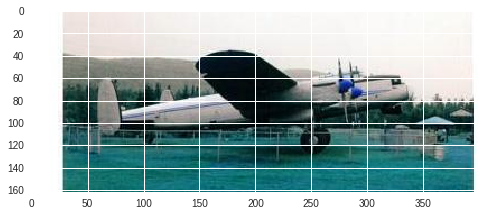

In [0]:
plt.imshow(train_dict[0][0])

## Parsing image files into categories:

#### Given an img_dict, creates two lists img_labels and img_list

Generally img_dict is modelled as to contain label as key
and the key's value contains a list which has all the 
images present in the category.

#### Parameters:
            img_dict - dictionary with keys containing label category
                       and corresponding values containing images
                       in that category.

#### Returns:
            (img_list, img_labels)
            img_labels: contains labels of all the images.
            img_list: contains list of all images.

In [0]:
def get_images_and_labels(img_dict):
    img_labels = []
    img_list = []
    for key in img_dict.keys():
            for img in img_dict[key]:                
                img_labels.append(key)
                img_list.append(img)
    return (img_list,  img_labels)

In [0]:
[train_imgs, train_labels] = get_images_and_labels(train_dict)
[test_imgs, test_labels] = get_images_and_labels(test_dict)

## Feature Extraction

#### Given a list of images, it generates of vocabulary which contains descriptors of all the images present in the img_list.

#### Parameters:

img_list - list containing all the images.

#### Returns:

(vocab_list, temp_list)
temp_list - list, where each element of the list is a numpy array containing all the feature descriptors of the patches present in an image.

#### ex: l
[1].shape == (x, 128)

vocab_list: a numpy array, which contains all the 
descriptors present in all the images.

vocab_list.shape == (x, 128)

where x is the total no of descriptors
present in the images.

128- size of descriptor.   

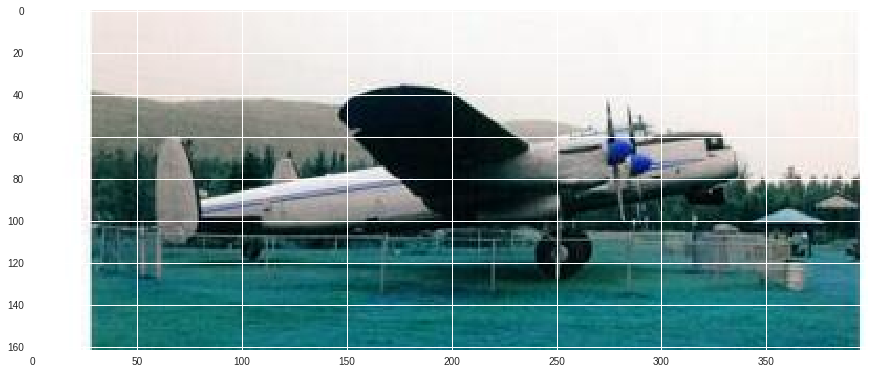

In [0]:
plt.figure(figsize=(15,15))
plt.imshow(train_imgs[0])

In [0]:
gray = cv2.cvtColor(train_imgs[0], cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)
img=0
kp_img = cv2.drawKeypoints(gray,kp,img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

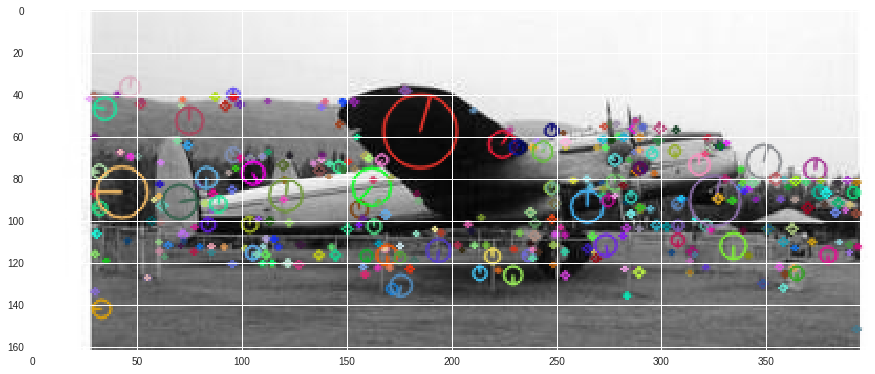

In [0]:
plt.figure(figsize=(15,15))
plt.imshow(kp_img)

In [0]:
def get_cluster_centres(jpg_img, k = 8):
    img = jpg_img
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(gray, None)

    [num, size] = des.shape
    # print(num)

    kmeans = KMeans(k)
    ret = kmeans.fit_predict(des)
    C = kmeans.cluster_centers_

    return C

In [0]:
get_cluster_centres(train_imgs[0], ).shape

(8, 128)

In [0]:
def get_sift_feature_descriptors(jpg_img):
    img = jpg_img
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(gray, None)
    return des

In [0]:
def generate_vocabulary(img_list):
    temp_list = []
    #flag = True
    for img in img_list:
        features = get_sift_feature_descriptors(img)
        temp_list.append(features)

    vocab_list = temp_list[0]

    for ftr in range(1, len(temp_list)):
        vocab_list = np.vstack((vocab_list, temp_list[ftr]))
        
    vocabulary = vocab_list
    return (vocab_list, temp_list)

## Dictionary Building:

In [0]:
(f_vocabulary, i_vocab)= generate_vocabulary(train_imgs)
(t_f_vocabulary, t_i_vocab)= generate_vocabulary(test_imgs)

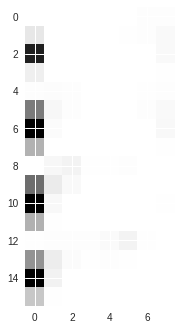

In [0]:
plt.imshow(f_vocabulary[10].reshape(16,8))

#### Given vocabulary, and number of clusters in which vocabulary is to be divided, applies kmeans algorithm and returns 

#### Parameters:
                    vocab - vocabulary containing feature descriptors
                    from all the images available for training.

                    n_clusters - Number of clusters for dividing vocab.
#### Returns:
                    kmeans - which is further used to predict.

In [0]:
def generate_clusters(vocab, n_clusters = 500):
    kmeans = KMeans(n_clusters).fit(vocab)
    return kmeans

In [0]:
n_clusters = 1000

## Coding:

`** Note: This will take quite some time **

In [0]:
kmeans = generate_clusters(f_vocabulary, n_clusters)

In [0]:
def generate_features(temp_list, kmeans, n_clusters):
    """
        given cluster centres(via kmeans) which are obtained from
        all the training images, what this function does is,
        for each image it creates a histogram where x axis is 
        nothing but all the clusters(0 to n_clusters) and
        for each descriptor of the image we calculate to which
        cluster it belongs and for each cluster y-axis contains
        no of times a cluster is predicted via kmeans.predict(descriptor).

        This can be further used for training classifier.

        Parameters:
                    temp_list = is the same temp_list from 
                                generate_vocabulary.
                    n_clusters = no of clusters in which training 
                                vocab is divided into.
                    kmeans = kmeans obtained from generate_clusters.

        Returns:
                    p_array - a numpy array which is of size
                              no_images x no_of_clusters.
    """
                    
    t_length = len(temp_list)
    p_array = np.zeros((1,n_clusters))

    for i in range(0, t_length):

        features = temp_list[i]
        (x1, y1) = features.shape

        t_array = np.zeros((1, n_clusters)) #an array for each image

        for j in range(0, x1):
            des = features[j]
            des = des.reshape(1, 128)
            ind = kmeans.predict(des)
            t_array[0][ind] += 1

        p_array = np.vstack((p_array, t_array))
    
    p_array = p_array[1:]
    return p_array

## Pooling

In [0]:
train_data = generate_features(i_vocab, kmeans, n_clusters)
test_data =  generate_features(t_i_vocab, kmeans, n_clusters)

## Classification

In [0]:
print("Applying SVM classifier.")
# SVM Classifier.
clf = svm.SVC()
fitted = clf.fit(train_data, train_labels)
predict = clf.predict(test_data)

In [0]:
print("Actual:")
print(test_labels)

print("predicted:")
print(predict)

In [0]:
#Confusion matrix.
test_labels = np.asarray(test_labels)
cnf_matrix = confusion_matrix(predict, test_labels)
np.set_printoptions(precision = 2)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
plot_confusion_matrix(cnf_matrix, classes = categories,
                                title='Confusion matrix')
plt.show()